In [1]:
import dataCleaning

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn 

from tqdm import tqdm

2023-05-17 09:45:14.392244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 09:45:14.792298: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-17 09:45:14.792325: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-17 09:45:16.206093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))

filtered_labels, filtered_images = dataCleaning.remove_min_occurences(labels, imgs)

X = filtered_images[14000:44000]
Z = filtered_labels[14000:44000]


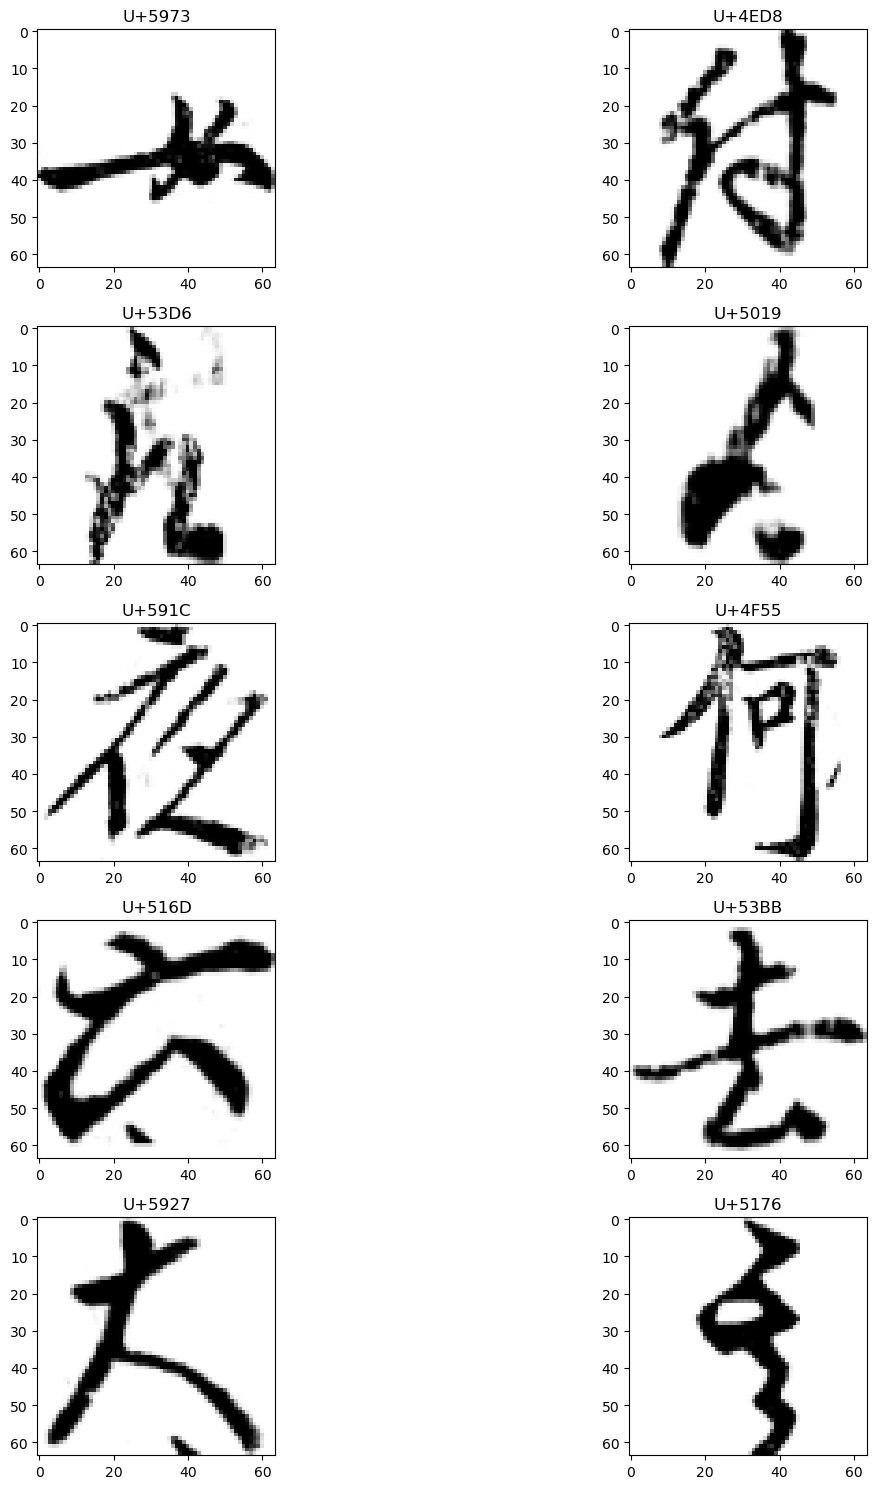

In [3]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l], cmap='Greys')
        ax[i,j].set_title(Z[l])
        
        
plt.tight_layout()

In [4]:
len(np.unique(Z))

92

In [5]:
le=LabelEncoder()


Y=le.fit_transform(Z)


Y=to_categorical(Y,len(np.unique(Z)))


X=np.array(X)


X=X/255


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding= 'Same', activation='relu', input_shape = (64,64, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(np.unique(Z)), activation="softmax"))

2023-05-17 09:45:23.901151: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-17 09:45:23.901242: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 09:45:23.901268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (108bb72cdfce): /proc/driver/nvidia/version does not exist
2023-05-17 09:45:23.901609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
batch_size=200
epochs=3

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.1)

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

#datagen.fit(x_train.reshape(10500, 64, 64, 1))

In [10]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        6240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 96)         0

In [12]:
History = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/3


2023-05-17 09:45:24.837416: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


112/112 [==============================] - 54s 467ms/step - loss: 2.0675 - accuracy: 0.5203 - val_loss: 0.6410 - val_accuracy: 0.8337
Epoch 2/3
112/112 [==============================] - 50s 444ms/step - loss: 0.4377 - accuracy: 0.8846 - val_loss: 0.3776 - val_accuracy: 0.8951
Epoch 3/3
112/112 [==============================] - 49s 436ms/step - loss: 0.2421 - accuracy: 0.9340 - val_loss: 0.3369 - val_accuracy: 0.9139


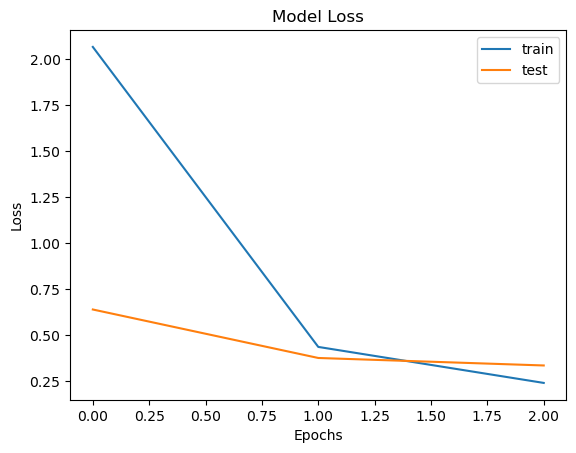

In [13]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [14]:
accuracy_history = []
accuracy_history_img = []

1/1 [==============================] - 0s 22ms/step
Predicted class: 4
Predicted class probability: 92.238849401474 %
[[2.56031485e-09 3.86386346e-05 3.68065866e-06 5.22775963e-06
  9.22388494e-01 1.92385400e-03 6.07510003e-07 6.13503346e-07
  4.70866837e-07 9.31596969e-06 5.51525181e-06 1.32945652e-05
  1.82604615e-03 1.38501113e-04 8.46537389e-03 1.83269634e-07
  2.62072776e-04 1.90485707e-06 4.39487803e-06 1.33386702e-05
  1.08007576e-07 1.94739940e-08 1.62630749e-03 2.43827469e-09
  7.54081384e-06 1.87452213e-04 5.05571079e-04 1.07426830e-02
  2.06648349e-03 7.62430136e-05 2.35227332e-03 7.69131118e-03
  2.12575949e-04 4.05774498e-03 5.34889055e-03 9.10914445e-04
  1.26532723e-05 1.95982750e-03 2.11525577e-04 3.62651117e-05
  2.58822722e-04 3.92962374e-09 2.02052775e-07 4.06498930e-06
  2.92836285e-06 7.99333133e-09 2.23850293e-05 3.21815605e-06
  1.72997743e-03 8.11864720e-06 1.91373820e-05 1.64669913e-07
  1.68780605e-06 1.12679055e-09 2.88258198e-05 1.54750546e-06
  9.79633536e-

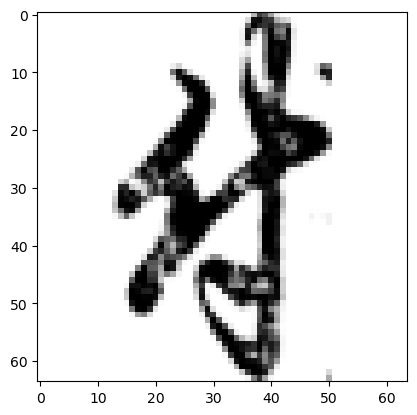

In [21]:
from matplotlib import pyplot


results = model.evaluate(x_test, y_test)
image_number = 2172
new_image = tf.expand_dims(x_test[image_number], 0)
predictions = model.predict(new_image)
predicted_class_index = predictions.argmax(axis=-1)[0]
predicted_class_probability = predictions[0][predicted_class_index]
print('Predicted class:', predicted_class_index)
print('Predicted class probability:', predicted_class_probability*100, "%")
print(predictions)
accuracy_history.append(predicted_class_probability*100)
accuracy_history_img.append(image_number)

pyplot.imshow(x_test[image_number], cmap='Greys')
#print(kanji(y_test[image_number]))


In [16]:
import webscraping

class_prediction = 1
print("Code: ", np.unique(Z)[class_prediction])
print(kanji(np.unique(Z)[class_prediction]))
webscraping.get_meaning(kanji(np.unique(Z)[class_prediction]))

Code:  U+4ECA
今

now



In [17]:
from matplotlib import pyplot
import random

accuracy_history = []
accuracy_history_img = []
predicted_class_index_list = [] 

for _ in range(100):
    image_number = random.randint(0, len(x_test) - 1)
    new_image = tf.expand_dims(x_test[image_number], 0)
    predictions = model.predict(new_image)
    predicted_class_index = predictions.argmax(axis=-1)[0]
    predicted_class_probability = predictions[0][predicted_class_index]
    print('Predicted class:', predicted_class_index)
    print('Predicted class probability:', predicted_class_probability * 100, "%")

    accuracy_history.append(predicted_class_probability * 100)
    accuracy_history_img.append(image_number)
    predicted_class_index_list.append(predicted_class_index)

    # pyplot.imshow(x_test[image_number], cmap='Greys')
    # pyplot.show()


1/1 [==============================] - 0s 25ms/step
Predicted class: 19
Predicted class probability: 99.99905824661255 %
1/1 [==============================] - 0s 23ms/step
Predicted class: 50
Predicted class probability: 94.809091091156 %
1/1 [==============================] - 0s 29ms/step
Predicted class: 79
Predicted class probability: 97.08750247955322 %
1/1 [==============================] - 0s 21ms/step
Predicted class: 3
Predicted class probability: 99.59977865219116 %
1/1 [==============================] - 0s 20ms/step
Predicted class: 1
Predicted class probability: 99.93077516555786 %
1/1 [==============================] - 0s 22ms/step
Predicted class: 11
Predicted class probability: 99.99997615814209 %
1/1 [==============================] - 0s 24ms/step
Predicted class: 88
Predicted class probability: 95.39613723754883 %
1/1 [==============================] - 0s 22ms/step
Predicted class: 49
Predicted class probability: 43.41643750667572 %
1/1 [==============================]

[99.99905824661255, 94.809091091156, 97.08750247955322, 99.59977865219116, 99.93077516555786, 99.99997615814209, 95.39613723754883, 43.41643750667572, 74.5722770690918, 99.07608032226562, 98.25014472007751, 96.93798422813416, 99.99760389328003, 98.91067147254944, 99.77133274078369, 99.50034022331238, 99.99415874481201, 99.99994039535522, 99.46449995040894, 99.56566095352173, 99.99655485153198, 75.79875588417053, 99.99362230300903, 99.77889060974121, 99.99990463256836, 96.54567837715149, 99.99966621398926, 99.87699389457703, 99.99271631240845, 87.46419548988342, 79.66831922531128, 88.04734945297241, 100.0, 94.59554553031921, 99.99562501907349, 63.9569878578186, 78.5385251045227, 97.88303971290588, 99.98427629470825, 99.97097849845886, 84.36028361320496, 99.60605502128601, 99.43417310714722, 91.41489267349243, 98.15977811813354, 73.99989366531372, 91.31574034690857, 98.90885949134827, 99.94494318962097, 99.93681311607361, 61.52133345603943, 99.99632835388184, 99.77750182151794, 61.476457

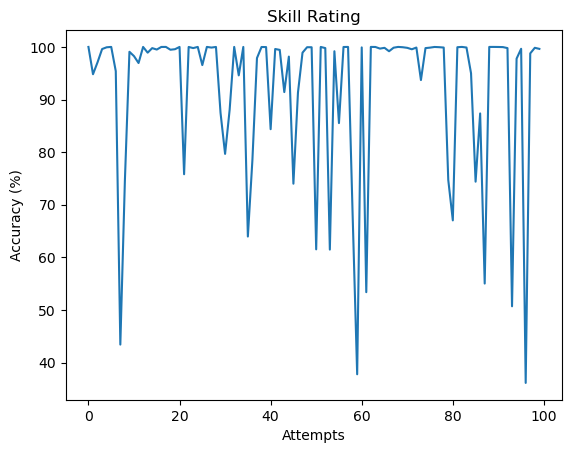

In [18]:

print(accuracy_history)
plt.plot(accuracy_history)
plt.title('Skill Rating')
plt.ylabel('Accuracy (%)')
plt.xlabel('Attempts')
plt.show()

In [19]:
result = []
for a, b, c in zip(accuracy_history_img, accuracy_history, predicted_class_index_list):
    result.append((a, b, c))

for r in range(len(result)):
    image_number = result[r][0]
    accuracy = result[r][1]
    predicted_class_index = result[r][2]
    
    print("Element:", r+1)
    print("Image number:", image_number)
    print("Accuracy:", accuracy, "%")
    print("Predicted class index:", predicted_class_index)
    print()

average = sum(accuracy_history) / len(accuracy_history)
print("Average:", average, "%")

Element: 1
Image number: 1828
Accuracy: 99.99905824661255 %
Predicted class index: 19

Element: 2
Image number: 1143
Accuracy: 94.809091091156 %
Predicted class index: 50

Element: 3
Image number: 6033
Accuracy: 97.08750247955322 %
Predicted class index: 79

Element: 4
Image number: 839
Accuracy: 99.59977865219116 %
Predicted class index: 3

Element: 5
Image number: 5543
Accuracy: 99.93077516555786 %
Predicted class index: 1

Element: 6
Image number: 6067
Accuracy: 99.99997615814209 %
Predicted class index: 11

Element: 7
Image number: 7308
Accuracy: 95.39613723754883 %
Predicted class index: 88

Element: 8
Image number: 4467
Accuracy: 43.41643750667572 %
Predicted class index: 49

Element: 9
Image number: 712
Accuracy: 74.5722770690918 %
Predicted class index: 71

Element: 10
Image number: 4837
Accuracy: 99.07608032226562 %
Predicted class index: 31

Element: 11
Image number: 3456
Accuracy: 98.25014472007751 %
Predicted class index: 84

Element: 12
Image number: 260
Accuracy: 96.93798